# Optimizing Online Sports Retail Revenue
In the project "Optimizing Revenue from Online Sports Retailing," we have product data for an online sportswear company. We are dealing with a variety of information stored in several tables. The information includes prices, discounts, revenue, ratings, reviews, product descriptions, and website traffic.

The idea for the project was taken from the website [DataCamp](https://www.datacamp.com/blog/sql-projects-for-all-levels?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=152984014494&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=726015683679&utm_targetid=aud-1940143831083:dsa-2222697809758&utm_loc_interest_ms=&utm_loc_physical_ms=21128&utm_content=DSA~blog~SQL&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p2_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-jan25&gad_source=1&gclid=Cj0KCQiA1p28BhCBARIsADP9HrM5Lbz_lOpMn73K1NnAB0TcOs9DcJHgdx02UhzfatOZFXbTDE2894waAs2CEALw_wcB)

SQL Projects for Advanced Level

Optimizing online sports retail revenue


---



The goal of this project is to optimize revenue from online retail sales of sports goods. To achieve this, we will dive into data such as prices, reviews, descriptions, ratings, revenue, and website traffic to identify key insights and determine the direction needed to increase revenue.This project provides an opportunity to step into the role of an analyst and improve your SQL skills.

**We have 5 tables:**

**product_id** is primary key

## info

| column         | data type | description                |
|----------------|-----------|----------------------------|
| product_name   | varchar   | Name of the product        |
| product_id     | varchar   | Unique ID for product      |
| description    | varchar   | Description of the product |

## finance

| column         | data type | description                                               |
|----------------|-----------|-----------------------------------------------------------|
| product_id     | varchar   | Unique ID for product                                     |
| listing_price  | float     | Listing price for product                                 |
| sale_price     | float     | Price of the product when on sale                         |
| discount       | float     | Discount, applied to the sale price         |
| revenue        | float     | Amount of revenue, in US dollars|

## reviews

| column         | data type | description                                               |
|----------------|-----------|-----------------------------------------------------------|
| product_name   | varchar   | Name of the product                                       |
| product_id     | varchar   | Unique ID for product                                     |
| rating         | float     | Product rating, scored from 1 to 5.0                   |
| reviews        | float     | Number of reviews for the product                        |

## traffic

| column         | data type | description                                               |
|----------------|-----------|-----------------------------------------------------------|
| product_id     | varchar   | Unique ID for product                                     |
| last_visited   | timestamp | Date and time the product was last viewed on the website  |

## brands

| column         | data type | description                                               |
|----------------|-----------|-----------------------------------------------------------|
| product_id     | varchar   | Unique ID for product                                     |
| brand          | varchar   | Brand of the product                                      |



In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('test.db')

files_and_tables = {
    "info.csv": "info",
    "brands.csv": "brands",
    "finance.csv": "finance",
    "traffic.csv": "traffic",
    "reviews.csv": "reviews"
}

for file, table in files_and_tables.items():

    df = pd.read_csv(file)

    df.to_sql(table, conn, if_exists='replace', index=False)
    print(f"Added file {file} to table {table}")

Added file info.csv to table info
Added file brands.csv to table brands
Added file finance.csv to table finance
Added file traffic.csv to table traffic
Added file reviews.csv to table reviews


# Data overview

In [3]:
query = """
Select *
From info

"""

result = pd.read_sql(query, conn)

result

,product_name,product_id,description
0,None,AH2430,None
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor..."
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's..."
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...
...,...,...,...
3174,Nike Tiempo Legend 8 Academy TF,AT6100-606,The Nike Tiempo Legend 8 Academy TF takes the ...
3175,Nike React Metcon AMP,CT9155-063,The Nike React Metcon AMP takes the stability ...
3176,Air Jordan 8 Retro,CI1236-100,The Air Jordan 8 Retro recaptures the memorabl...
3177,Nike Air Max 98,AH6799-300,The Nike Air Max 98 features the OG design lin...


In [4]:
query = """
Select *
From brands

"""

result = pd.read_sql(query, conn)

result

,product_id,brand
0,AH2430,None
1,G27341,Adidas
2,CM0081,Adidas
3,B44832,Adidas
4,D98205,Adidas
...,...,...
3174,AT6100-606,Nike
3175,CT9155-063,Nike
3176,CI1236-100,Nike
3177,AH6799-300,Nike


In [5]:
query = """
Select *
From finance

"""

result = pd.read_sql(query, conn)

result

,product_id,listing_price,sale_price,discount,revenue
0,AH2430,NaN,NaN,NaN,NaN
1,G27341,75.99,37.99,0.5,1641.17
2,CM0081,9.99,5.99,0.4,398.93
3,B44832,69.99,34.99,0.5,2204.37
4,D98205,79.99,39.99,0.5,5182.70
...,...,...,...,...,...
3174,AT6100-606,0.00,64.95,0.0,0.00
3175,CT9155-063,0.00,139.95,0.0,251.91
3176,CI1236-100,159.95,127.97,0.0,230.35
3177,AH6799-300,0.00,169.95,0.0,1223.64


In [6]:
query = """
Select *
From traffic

"""

result = pd.read_sql(query, conn)

result

,product_id,last_visited
0,AH2430,2018-05-19 15:13:00
1,G27341,2018-11-29 16:16:00
2,CM0081,2018-02-01 10:27:00
3,B44832,2018-09-07 20:06:00
4,D98205,2019-07-18 15:26:00
...,...,...
3174,AT6100-606,None
3175,CT9155-063,2019-02-08 18:40:00
3176,CI1236-100,2020-02-19 21:44:00
3177,AH6799-300,2018-02-28 07:37:00


In [7]:
query = """
Select *
From reviews

"""

result = pd.read_sql(query, conn)

result

,product_id,rating,reviews
0,AH2430,NaN,NaN
1,G27341,3.3,24.0
2,CM0081,2.6,37.0
3,B44832,4.1,35.0
4,D98205,3.5,72.0
...,...,...,...
3174,AT6100-606,0.0,0.0
3175,CT9155-063,3.0,1.0
3176,CI1236-100,5.0,1.0
3177,AH6799-300,4.0,4.0


# Count missing values

In [8]:
query = """
SELECT COUNT(*) as total_rows,
    COUNT(description) as count_description,
    COUNT(listing_price) as count_listing_price,
    COUNT(last_visited) as count_last_visited,
    COUNT(reviews) as count_reviews,
    COUNT(brand) as count_brand
FROM info
JOIN finance ON info.product_id = finance.product_id
JOIN traffic ON info.product_id = traffic.product_id
JOIN brands ON info.product_id = brands.product_id
JOIN reviews ON info.product_id = reviews.product_id

"""

result = pd.read_sql(query, conn)

result

,total_rows,count_description,count_listing_price,count_last_visited,count_reviews,count_brand
0,3179,3117,3120,2928,3120,3120


So, we have a total of 3179 columns. Looking at the other columns, there isn't that much missing data.

# Adidas vs Nike

How do the price points of Nike and Adidas products differ? Answering this question, we can understand which brand is the most popular, that is, we will find out where the larger customer market is.

In [9]:
query = """
SELECT brand, round(listing_price) as listing_price, COUNT(finance.product_id) as count_product
FROM brands
JOIN finance ON brands.product_id = finance.product_id
JOIN traffic ON brands.product_id = traffic.product_id
WHERE listing_price > 0
GROUP BY brand, listing_price
ORDER BY listing_price DESC;

"""

result = pd.read_sql(query, conn)

result

,brand,listing_price,count_product
0,Adidas,300.0,2
1,Adidas,280.0,4
2,Adidas,240.0,5
3,Adidas,230.0,8
4,Adidas,220.0,11
...,...,...,...
72,Adidas,15.0,27
73,Adidas,13.0,27
74,Adidas,12.0,1
75,Adidas,10.0,11


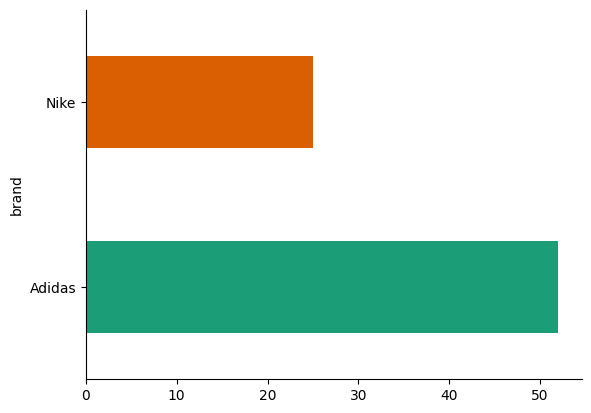

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
result.groupby('brand').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

So we can see that Adidas is more popular than Nike, and Adidas has some of the most expensive products, which could indicate that Adidas has more revenue. We also have 77 unique prices, so for clarity, let's break down the prices by category.

In [11]:
query = """

SELECT b.brand, COUNT(f.product_id) as count_product, SUM(f.revenue) as total_revenue,
CASE WHEN f.listing_price < 50 THEN 'Budget'
     WHEN f.listing_price >= 50 AND f.listing_price < 80 THEN 'Average'
     WHEN f.listing_price >= 80 AND f.listing_price < 150 THEN 'Expensive'
     ELSE 'Elite' END AS price_category
FROM finance as f
INNER JOIN brands as b
ON b.product_id = f.product_id
GROUP BY b.brand, price_category
HAVING b.brand IS NOT NULL
ORDER BY total_revenue DESC;

"""

result = pd.read_sql(query, conn)

result


,brand,count_product,total_revenue,price_category
0,Adidas,1092,4306862.16,Average
1,Adidas,550,3835514.44,Expensive
2,Adidas,799,1800692.68,Budget
3,Adidas,134,1583549.80,Elite
4,Nike,366,600907.60,Budget
5,Nike,96,117400.75,Expensive
6,Nike,52,70136.03,Elite
7,Nike,31,13838.88,Average


Adidas products generate the highest revenue regardless of price category

# Is there a difference in the amount of discount offered between the brands?

In [12]:
query = """

SELECT b.brand, Avg(f.discount)*100 as average_discount
From brands as b
JOIN finance as f
ON b.product_id = f.product_id
Group by b.brand
Having b.brand is NOT NULL

"""

result = pd.read_sql(query, conn)

result

,brand,average_discount
0,Adidas,33.452427
1,Nike,0.000000


Wow! It's interesting that Nike products have no discounts at all, while Adidas products have higher revenue and have discounts.
As an option for the company, it is to reduce the discount on Adidas products and this will increase revenue, or to make a discount on Nike products, which will increase demand and, accordingly, increase revenue

# Is there any correlation between revenue and reviews? And if so, how strong is it?

Unfortunately, SQLite3 does not have a built-in correlation function, so the first option is to calculate strictly according to the formula. 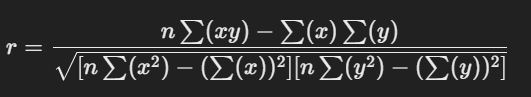

The second option is to switch to pandas and calculate the correlation there

In [13]:
query = """

SELECT
    (COUNT(*) * SUM(f.revenue * r.reviews) - SUM(f.revenue) * SUM(r.reviews)) /
    (SQRT((COUNT(*) * SUM(f.revenue * f.revenue) - SUM(f.revenue) * SUM(f.revenue)) *
          (COUNT(*) * SUM(r.reviews * r.reviews) - SUM(r.reviews) * SUM(r.reviews))))
AS correlation
FROM finance AS f
JOIN reviews AS r
ON f.product_id = r.product_id;


"""

result = pd.read_sql(query, conn)

result

,correlation
0,0.658203


In [14]:
query = """
SELECT f.revenue, r.reviews
FROM finance AS f
JOIN reviews AS r
ON f.product_id = r.product_id
"""
data = pd.read_sql(query, conn)

correlation = data['revenue'].corr(data['reviews'])
print("Correlation:", correlation)


Correlation: 0.6518512283481294


This correlation value indicates that there is a positive correlation between the number of reviews and revenue, i.e. the more reviews on the site about this product, the greater the revenue from this product.

# Does the length of a product's description influence a product's rating and reviews?

In [15]:
query = """

SELECT
    CASE
        WHEN LENGTH(i.description) < 50 THEN 'Short'
        WHEN LENGTH(i.description) BETWEEN 50 AND 150 THEN 'Medium'
        ELSE 'Long'
    END AS description_category,
    AVG(r.rating) AS avg_rating,
    Count(reviews)
FROM info AS i
JOIN reviews AS r
ON i.product_id = r.product_id
GROUP BY description_category
ORDER BY description_category;

"""

result = pd.read_sql(query, conn)

result

,description_category,avg_rating,Count(reviews)
0,Long,3.266459,3044
1,Medium,3.262667,75
2,Short,1.500000,1


I decided to make 3 categories of descriptions and as we can see there is no difference in the rating between medium and long, so the length of the description does not affect the rating, but it does affect the number of reviews. As for the short description, there is only one, so ignore it.

# Are there any trends or gaps in the volume of reviews by month?

In [16]:
query = """

SELECT
    b.brand,
    strftime('%m', t.last_visited) AS visit_month,
    COUNT(r.reviews) AS count_reviews
FROM traffic AS t
JOIN brands AS b ON t.product_id = b.product_id
JOIN reviews AS r ON t.product_id = r.product_id

WHERE b.brand IS NOT NULL AND t.last_visited IS NOT NULL
GROUP BY b.brand, visit_month
ORDER BY b.brand, visit_month;




"""

result = pd.read_sql(query, conn)

result

,brand,visit_month,count_reviews
0,Adidas,01,253
1,Adidas,02,272
2,Adidas,03,269
3,Adidas,04,180
4,Adidas,05,172
5,Adidas,06,159
6,Adidas,07,170
7,Adidas,08,189
8,Adidas,09,181
9,Adidas,10,192


Interestingly, in the first quarter of the year, the number of reviews is higher than in the other 9 months, meaning that demand for shoes or clothing increases at the beginning of the year, and it may be worth raising discounts to increase revenue. Also, the number of reviews for Adidas products is significantly higher than for Nike products, so people are more likely to buy Adidas.

# How much of the company's stock consists of footwear items? What is the median revenue generated by these products?


In [17]:
query = """

SELECT
    COUNT(*) * 100.0 / (SELECT COUNT(*) FROM info) AS footwear_percentage
FROM info
WHERE LOWER(description) LIKE '%footwear%'
   OR LOWER(description) LIKE '%shoe%'
   OR LOWER(description) LIKE '%boot%'
"""

result = pd.read_sql(query, conn)

result



,footwear_percentage
0,75.872916


It is obvious that there are significantly more products related to footwear than to clothing, as much as 76%

In the following query, I use a Common Table Expression (CTE) to filter products by type (shoes or clothing) and then use the CTE to find the median (there is no built-in median function).

In [18]:
query = """

WITH footwear_revenue AS (
    SELECT f.revenue
    FROM finance AS f
    JOIN info AS i
    ON f.product_id = i.product_id
    WHERE LOWER(description) LIKE '%footwear%'
    OR LOWER(description) LIKE '%shoe%'
    OR LOWER(description) LIKE '%boot%'
    ORDER BY f.revenue
)

SELECT
    AVG(revenue) AS median_revenue
FROM (
    SELECT revenue
    FROM footwear_revenue
    LIMIT 2 - (SELECT COUNT(*) FROM footwear_revenue) % 2  -- Select one or two elements based on the parity (odd/even count of rows)
    OFFSET (SELECT (COUNT(*) - 1) / 2 FROM footwear_revenue)  -- Offset to the middle element (center of the dataset)

);

"""

result = pd.read_sql(query, conn)

result

,median_revenue
0,3394.84


So, the median revenue is over $3,400!

For comparison, let's see how does footwear's median revenue differ from clothing products?

# How does footwear's median revenue differ from clothing products?

In [19]:
query = """

SELECT
    COUNT(*) * 100.0 / (SELECT COUNT(*) FROM info) AS footwear_percentage
FROM info
WHERE LOWER(description) NOT LIKE '%footwear%'
   AND LOWER(description) NOT LIKE '%shoe%'
   AND LOWER(description) NOT LIKE '%boot%'
"""

result = pd.read_sql(query, conn)

result

,footwear_percentage
0,22.176785


In [20]:

query = """

WITH footwear_revenue AS (
    SELECT f.revenue
    FROM finance AS f
    JOIN info AS i
    ON f.product_id = i.product_id
    WHERE LOWER(description) NOT LIKE '%footwear%'
    AND LOWER(description) NOT LIKE '%shoe%'
    AND LOWER(description) NOT LIKE '%boot%'
    ORDER BY f.revenue
)

SELECT
    AVG(revenue) AS median_revenue
FROM (
    SELECT revenue
    FROM footwear_revenue
    LIMIT 2 - (SELECT COUNT(*) FROM footwear_revenue) % 2  -- Select one or two elements based on the parity (odd/even count of rows)
    OFFSET (SELECT (COUNT(*) - 1) / 2 FROM footwear_revenue)  -- Offset to the middle element (center of the dataset)

);

"""

result = pd.read_sql(query, conn)

result


,median_revenue
0,647.64


Indeed, clothing brings in significantly less revenue than shoes.

# Conclusion

So, to increase revenue, a company should pay attention to the following:


1.   Adidas products are more popular and generate more revenue than Nike products.
2.   Adidas products have discounts, an average of 30%, and at the same time bring a lot of income, while Nike products do not have any discounts, so there are 2 options:
  1. Reduce discounts on Adidas, which will increase income
  2. Make discounts on Nike, which will make these products more popular, which will also increase income
3. The length of the description actually does not affect revenue, but with a long description, there are many reviews, which increases the popularity of the product, because we have learned that there is a positive correlation between reviews and revenue.
4. In the first quarter of the year, there is a rapid increase in the number of reviews, so it is worth making discounts during these months, as demand is growing.
5. And finally, footwear is the most popular sports product, accounting for 77% of sales and bringing in an average of 3,400 dolars , so it is worth increasing the number of such products, but also not forgetting about clothing, which brings in about 500 dolars.
